In [ ]:
import pandas as pd
user_df = pd.read_csv("user_351715.csv")
user_df.set_index('date', inplace=True) 
user_df.index = pd.to_datetime(user_df.index) 
# user_df.index = user_df.index.to_period('M') 
phones = pd.unique(user_df.phone) 
new_rent = pd.DataFrame() 
uniq_date_list = user_df.index.unique() 
new_rent['uniq_date'] = uniq_date_list 
new_rent.set_index('uniq_date', inplace=True) 
# new_rent['count'] = 0 
# new_rent['days_in_month'] = 0 
 
new_rent['year'] = new_rent.index.year.astype(int) 
new_rent['month'] = new_rent.index.month.astype(int) 
new_rent['day'] = new_rent.index.day.astype(int) 
new_rent['dayofweek'] = new_rent.index.dayofweek 
 
for i in phones: 
    new_rent[i]=0 
for date_rent in uniq_date_list: 
 
    # print(user_df.loc[user_df.index == date_rent, 'phone']) 
    # print(date_rent) 
    for phone in phones: 
        # print(phone) 
     
         
        # print(phone) 
        # print(user_df.loc[user_df.index == date_rent, 'phone'].to_list()) 
        if phone in user_df.loc[user_df.index == date_rent, 'phone'].to_list(): 
            new_rent[phone][date_rent] = 1 
        else: 
            new_rent[phone][date_rent] = 0 
        # new_rent[phone][date_rent] = user_df[user_df.loc[user_df.index == date_rent]].loc[user_df['phone'] == phone] 
    # p = pd.Period(date_rent) 
    # new_rent['days_in_month'][date_rent] /= p.days_in_month 
new_rent = new_rent.sort_index() 
# new_rent.to_csv('test.csv') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


KeyboardInterrupt: ignored

In [2]:
import pandas as pd
pd.read_csv("test_334850.csv")

: 

: 

In [1]:
import pandas as pd

df = pd.read_csv("test_334850.csv")
new_rent = df.loc[:, df.columns != 'uniq_date']
X_train = new_rent.loc[:, 'year':'dayofweek'][:-1] 
 
X_test = new_rent.loc[:,'year':'dayofweek'][-1:] 
 
y_train = new_rent.loc[:, 'dayofweek':][:-1] 
y_test = new_rent.loc[:, 'dayofweek':][-1:]
y_train = y_train.loc[:, y_train.columns!='dayofweek']
y_test = y_test.loc[:, y_test.columns!='dayofweek']
seq_in = X_train.to_numpy()
seq_in = seq_in.reshape(X_train.shape[0], 1, 4)
seq_out = y_train.to_numpy()
print(seq_out.shape)
seq_out = seq_out.reshape(X_train.shape[0], 1, y_train.shape[1])
print(seq_out)

(162, 1356)
[[[1 1 1 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]]]


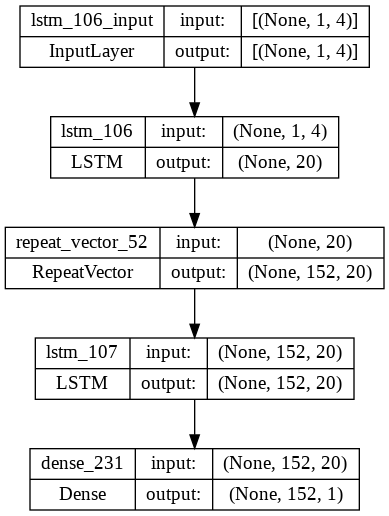

In [ ]:
# # lstm autoencoder predict sequence
# import tensorflow as tf
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import RepeatVector
# from keras.layers import TimeDistributed
# from keras.utils import plot_model
# # define input sequence
# # seq_in = array([[1, 2, 1, 30, 100, 0, 0], [2, 4, 2, 60, 0, 0, 100], [1, 2, 1, 30, 100, 0, 0], [10, 20, 10, 300, 0, 100, 0], [2, 4, 2, 60, 0, 0, 100]])
# # reshape input into [samples, timesteps, features]
# # n_in = len(df_np)
# # seq_in = seq_in.reshape((5, 1, 7))
# # prepare output sequence
# # define model
# model = Sequential()
# model.add(LSTM(20, activation='relu', input_shape=(1,4)))
# model.add(RepeatVector(152))
# model.add(LSTM(20, activation='relu', return_sequences=True))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

# tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)


In [ ]:
# # fit model
# model.fit(seq_in, seq_out, epochs=100, verbose=0)

KeyboardInterrupt: ignored

In [ ]:
# # demonstrate prediction
# test_seq = array([[1, 2, 1, 30, 100, 0, 0], [2, 4, 2, 60, 0, 0, 100]])
# test_seq = test_seq.reshape((2, 1, 7))
# yhat = model.predict(test_seq)
# print(yhat)

1/1 [==============================] - 1s 674ms/step
[[[ 4.126034 ]
  [ 5.9562163]
  [ 8.064974 ]]

 [[ 4.1148524]
  [ 8.450545 ]
  [13.023504 ]]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

class Autoencoder(Model):
  def __init__(self, input_dim, out_dim):
    super(Autoencoder, self).__init__()
    self.input_dim = input_dim   
    self.out_dim = out_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(self.input_dim, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(self.out_dim, activation='relu'),
      layers.Dense(self.out_dim, activation='sigmoid'),
      layers.Reshape((1, self.out_dim))
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(4, y_train.shape[1])


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(seq_in, seq_out, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 23ms/step - loss: 0.1196
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0062
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0062
Epoch 4/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0062
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0062
Epoch 6/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0062
Epoch 7/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0062
Epoch 8/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0062
Epoch 9/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0062
Epoch 10/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0062
Epoch 11/100
6/6 [==============================] - 0s 42ms/step - loss: 0.0062
Epoch 12/100
6/6 [==============================] - 0s 43ms/step - loss: 0.0062
Epoch 13/100
6/6 [==============================]

In [ ]:
# test_seq = array([[1, 2, 1, 30, 100, 0, 0], [2, 4, 2, 60, 0, 0, 100]])
# X_test = X_test.to_numpy()
# X_test = X_test.reshape((1, 1, 4))
yhat = autoencoder.predict(X_test)
yhat = yhat[0][0]
print(yhat)
print("Top:")
print(np.argpartition(yhat, -5)[-5:])
ids = list(np.argpartition(yhat, -5)[-5:])
for i in ids:
  print(list(y_test.columns)[i])

1/1 [==============================] - 0s 240ms/step
[7.4612617e-06 5.4262667e-03 1.7794378e-05 ... 9.1015565e-05 1.3329939e-06
 1.5457798e-04]
Top:
[ 821 1032  622 1097 1058]
79212820365
79220423921
79214193009
79210053534
79220462284


In [ ]:
autoencoder.save("var2.ckpt")

In [ ]:
model = Autoencoder(4, y_test.shape[1])
model.load_weights("var2.ckpt")

In [ ]:
print(0.30292082 > 0.34071162)

False


In [ ]:
!pip list | grep keras

keras                         2.9.0
keras-vis                     0.4.1


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

class Autoencoder(Model):
  def __init__(self, input_dim, out_dim):
    super(Autoencoder, self).__init__()
    self.input_dim = input_dim   
    self.out_dim = out_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(self.input_dim, activation='relu'),
      layers.Dense(4, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(self.out_dim, activation='relu'),
      layers.Dense(self.out_dim, activation='sigmoid'),
      layers.Reshape((1, self.out_dim))
    ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

model = Autoencoder(4, 71)
model.load_weights("var1.ckpt")

In [ ]:
from google.colab import files
files.download("/content/var1.ckpt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>